# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Trader\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

Python-dotenv could not parse statement starting at line 5


In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,Whether youre looking to make a larger investm...,0.0772,0.039,0.0,0.961
1,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.0,0.873
2,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829
3,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865
4,The inevitable has happened: You can now purch...,0.3182,0.065,0.0,0.935


In [7]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,Whether youre looking to make a larger investm...,0.0772,0.039,0.0,0.961
1,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.0,0.966
2,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829
3,Payment card network Visa has announced that t...,0.0000,0.000,0.0,1.000
4,"ConsenSys, a key player in crypto and a major ...",0.2732,0.062,0.0,0.938


In [8]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.391160,0.102300,0.013900,0.88375
std,0.255005,0.063299,0.029882,0.07951
min,0.000000,0.000000,0.000000,0.70900
25%,0.272575,0.063750,0.000000,0.82825
50%,0.340000,0.080500,0.000000,0.90650
75%,0.608725,0.144000,0.000000,0.93625
max,0.771700,0.240000,0.102000,1.00000


In [9]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.003550,0.037550,0.035350,0.927100
std,0.333481,0.054729,0.045399,0.074754
min,-0.571900,0.000000,0.000000,0.735000
25%,-0.263525,0.000000,0.000000,0.917750
50%,0.000000,0.000000,0.000000,0.937000
75%,0.126200,0.062500,0.071000,0.974500
max,0.750600,0.172000,0.145000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin (0.100700 > 0.037550)

Q: Which coin had the highest compound score?

A: Bitcoin (0.771700 > 0.750600)

Q. Which coin had the highest positive score?

A: Bitcoin (0.24000 > 0.17200)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer() 

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))
   
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [15]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Whether youre looking to make a larger investm...,0.0772,0.039,0.0,0.961,"[Whether, youre, looking, make, larger, invest..."
1,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.0,0.873,"[promised, earlier, year, Tesla, accepts, paym..."
2,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829,"[Cryptocurrency, continues, gain, mainstream, ..."
3,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865,"[crypto, industry, whole, seen, momentous, yea..."
4,The inevitable has happened: You can now purch...,0.3182,0.065,0.0,0.935,"[inevitable, happened, purchase, Tesla, vehicl..."


In [16]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Whether youre looking to make a larger investm...,0.0772,0.039,0.0,0.961,"[Whether, youre, looking, make, larger, invest..."
1,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.0,0.966,"[Venmo, jumping, aboard, cryptocurrency, bandw..."
2,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829,"[Cryptocurrency, continues, gain, mainstream, ..."
3,Payment card network Visa has announced that t...,0.0000,0.000,0.0,1.000,"[Payment, card, network, Visa, announced, tran..."
4,"ConsenSys, a key player in crypto and a major ...",0.2732,0.062,0.0,0.938,"[ConsenSys, key, player, crypto, major, propon..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Bitcoin', 'Ethereum'), 2),
 (('Ethereum', 'Bitcoin'), 2),
 (('Bitcoin', 'Cash'), 2),
 (('Cash', 'Litecoin'), 2),
 (('earlier', 'year'), 2),
 (('Bitcoin', 'according'), 2),
 (('according', 'Tesla'), 2),
 (('Elon', 'Musk'), 2),
 (('Venmo', 'app'), 2),
 (('char', 'Reuters'), 2),
 (('Reuters', 'Staff'), 2),
 (('Inc', 'major'), 2),
 (('major', 'bitcoin'), 2),
 (('bitcoin', 'corporate'), 2),
 (('corporate', 'backer'), 2),
 (('backer', 'said'), 2),
 (('said', 'Monday'), 2),
 (('Monday', 'non-employee'), 2),
 (('non-employee', 'director'), 2),
 (('director', 'get'), 2)]

In [19]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Bitcoin', 'Ethereum'), 2),
 (('Ethereum', 'Bitcoin'), 2),
 (('Bitcoin', 'Cash'), 2),
 (('Cash', 'Litecoin'), 2),
 (('Venmo', 'app'), 2),
 (('Ethereum', 'blockchain'), 2),
 (('NFT', 'craze'), 2),
 (('Coinbase', 'direct'), 2),
 (('Ethereum', 'network'), 2),
 (('all-time', 'high'), 2),
 (('Damien', 'Hirst'), 2),
 (('Whether', 'youre'), 1),
 (('youre', 'looking'), 1),
 (('looking', 'make'), 1),
 (('make', 'larger'), 1),
 (('larger', 'investment'), 1),
 (('investment', 'want'), 1),
 (('want', 'dabble'), 1),
 (('dabble', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'purchase'), 1)]

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Bitcoin', 9),
 ('bitcoin', 8),
 ('Tesla', 7),
 ('year', 5),
 ('said', 4),
 ('Reuters', 4),
 ('cryptocurrencies', 3),
 ('PayPal', 3),
 ('Musk', 3)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Ethereum', 6),
 ('Bitcoin', 5),
 ('cryptocurrency', 4),
 ('announced', 4),
 ('network', 4),
 ('NFT', 4),
 ('April', 4),
 ('Venmo', 3),
 ('social', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [24]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

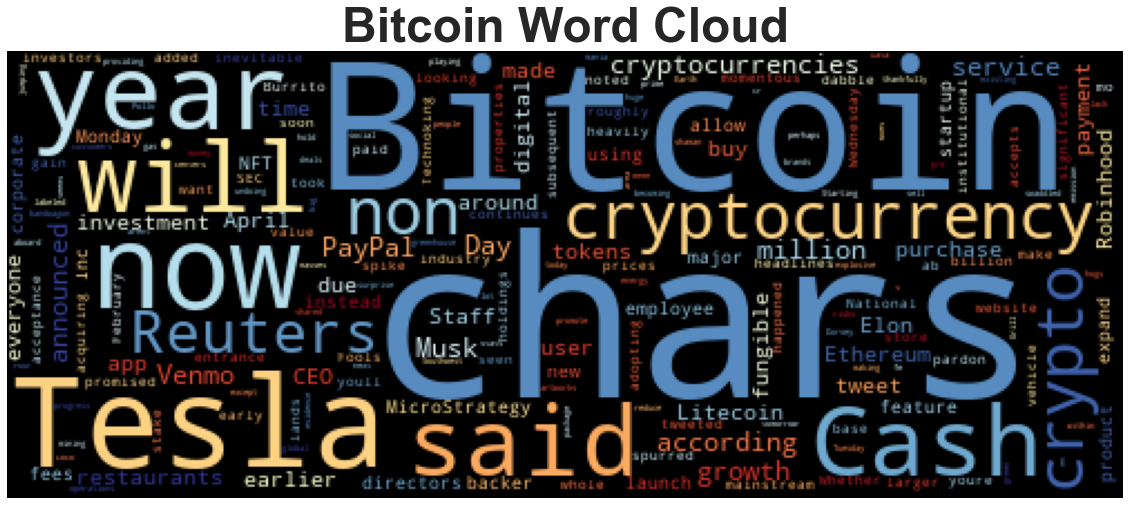

In [25]:
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

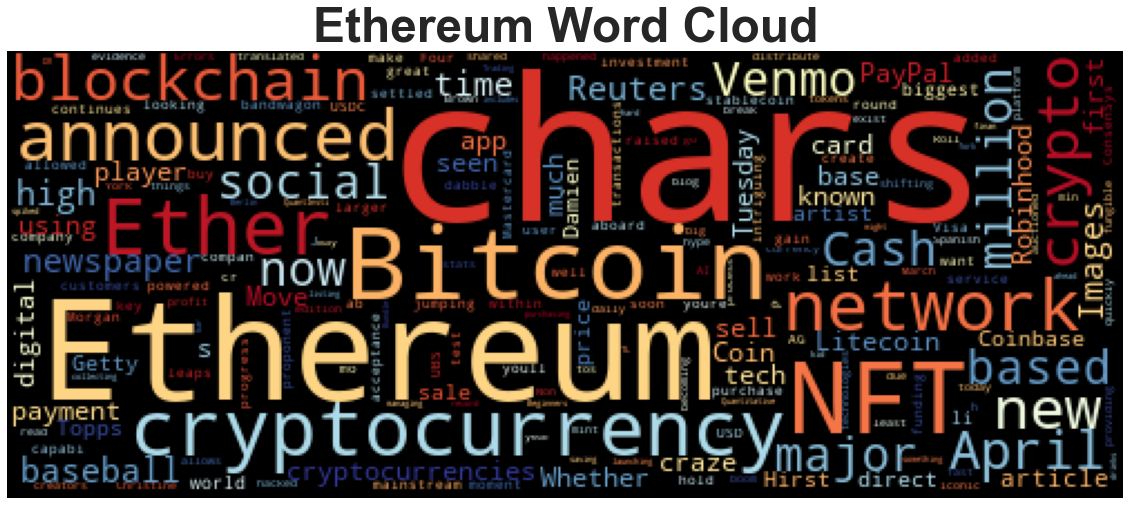

In [26]:
# Generate the Ethereum word cloud
wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars]As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla\'s website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]The crypto industry as a whole has seen a momentous year of growth, heavily spurred on by the entrance of institutional investors adopting bitcoin due to its store of value properties. The 2020 spike… [+4675 chars]The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin.\xa0\r\nThis is according to Tesla CEO, pardon, Technoking Elon

In [31]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [32]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [33]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Bitcoin GPE
Ethereum GPE
Bitcoin Cash GPE
Litecoin PERSON
earlier this year DATE
Tesla ORDINAL
Bitcoin GPE
Tesla ORG
Elon Musk ORG
Musk ORG
Bitcoin GPE
Tesla ORDINAL
PayPal PRODUCT
Bitcoin GPE
Ethereum GPE
Bitcoin Cash GPE
Litecoin PERSON
Venmo ORG
70 million CARDINAL
a momentous year DATE
bitcoin GPE
2020 DATE
Tesla ORDINAL
Bitcoin GPE
Tesla ORDINAL
Technoking Elon Musk ORG
Wednesday DATE
Tesla WORK_OF_ART
earlier this year DATE
bitcoin GPE
roughly $1.5 billion MONEY
early February DATE
SEC ORG
Burrito Day DATE
April Fools Day this year DATE
tomorrow DATE
Pollo Loco ORG
chars]Earth Day DATE
Jack Dorsey PERSON
Tuesday DATE
Venmo ORG
a big year DATE
Robinhood PERSON
today DATE
Christine Brown PERSON
Reuters ORG
Reuters ORG
Monday DATE
bitcoin GPE
the moon LOC
Dogecoin PERSON
DOGE PERSON
this morning TIME
Checkout GPE
Crypto PERSON
millions CARDINAL
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
bitcoin GPE
Funko PERSON
NFT ORG
TokenWave ORG
Kuber PERSON
India GPE
Thursday DATE
$25 mi

---

### Ethereum NER

In [34]:
# Concatenate all of the Ethereum text together
all_eth_text = eth.text.str.cat()
all_eth_text

"Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars]Venmo is jumping aboard the cryptocurrency bandwagon.\xa0\r\nThe social payment service announced on Tuesday that its customers can now buy, hold, and sell cryptocurrencies within the Venmo app.\xa0\r\nFour cr… [+1524 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]Payment card network Visa has announced that transactions can be settled using USD Coin (USDC), a stablecoin powered by the Ethereum blockchain. Crypto.com is the first company to test the new capabi… [+2187 chars]ConsenSys, a key player in crypto and a major proponent of the Ethereum blockchain, has raised a\xa0$65 million funding round from\xa

In [35]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [36]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [37]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Bitcoin GPE
Ethereum GPE
Bitcoin Cash GPE
Litecoin PERSON
Tuesday DATE
Venmo ORG
PayPal PRODUCT
Bitcoin GPE
Ethereum GPE
Bitcoin Cash GPE
Litecoin PERSON
Venmo ORG
70 million CARDINAL
Visa ORG
USD Coin ORG
Ethereum ORG
Crypto.com ORG
first ORDINAL
$65 million MONEY
J.P. Morgan PERSON
Mastercard ORG
UBS AG ORG
NFT ORG
Roll ORG
a big year DATE
Robinhood PERSON
today DATE
Christine Brown PERSON
26, 2021 DATE
1 min QUANTITY
Spanish NORP
AI GPE
New York Times ORG
first ORDINAL
NFT ORG
36.32 MONEY
April 3 DATE
90% PERCENT
as much as 8% PERCENT
Tuesday DATE
Coinbase ORG
Berlin GPE
April 14 DATE
Eth PERSON
hours TIME
Beeple PERSON
$69 million MONEY
NFT ORG
24 CARDINAL
Ethereum ORG
SOPA Images/Getty Images
 ORG
2,400 MONEY
Thursday DATE
$100 billion MONEY
Major League Baseball ORG
NFT ORG
Topps GPE
16th April 2021 DATE
The Art Newspaper ORG
CNN ORG
Scam ORG
Hirst ORG
Chris Young PERSON
Superstar ORG
Damien Hirst PERSON
Reuters ORG
April 18 DATE
Reuters ORG
Bitcoin GPE
7.7% PERCENT
55,408.08 MON

---